In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers, models

In [41]:
vehicle_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='Vehicle_image/Vehicles',
    labels='inferred',
    label_mode='categorical',  # This gives one-hot encoded labels
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

Found 3188 files belonging to 4 classes.


In [42]:
# 2. Split into train and validation sets
train_size = int(0.8 * tf.data.experimental.cardinality(vehicle_data).numpy())
val_size = tf.data.experimental.cardinality(vehicle_data).numpy() - train_size

train_ds = vehicle_data.take(train_size)
val_ds = vehicle_data.skip(train_size)

In [43]:
# 3. Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [44]:
class_names = vehicle_data.class_names
print("Classes:", class_names)

Classes: ['Cars', 'Planes', 'Ships', 'Trains']


In [45]:
mobilenet_base = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

mobilenet_base.trainable = False

In [46]:
model = models.Sequential([
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes → softmax
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [47]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=10
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 72s 859ms/step - accuracy: 0.5690 - loss: 1.0617 - val_accuracy: 0.8646 - val_loss: 0.4056
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 780ms/step - accuracy: 0.8131 - loss: 0.5082 - val_accuracy: 0.8694 - val_loss: 0.3353
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 683ms/step - accuracy: 0.8466 - loss: 0.4227 - val_accuracy: 0.9108 - val_loss: 0.2654
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 693ms/step - accuracy: 0.8632 - loss: 0.3479 - val_accuracy: 0.8790 - val_loss: 0.3278
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 61s 752ms/step - accuracy: 0.8789 - loss: 0.3338 - val_accuracy: 0.9140 - val_loss: 0.2526
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 718ms/step - accuracy: 0.8934 - loss: 0.2960 - val_accuracy: 0.9188 - val_loss: 0.2117
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 664ms/step - accuracy: 0.9029 - loss: 0.2657 - val_accuracy: 0.9268 - val_loss: 0.2097
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 689ms/step - accuracy: 0.9131 - loss: 0.2478 - val_accu

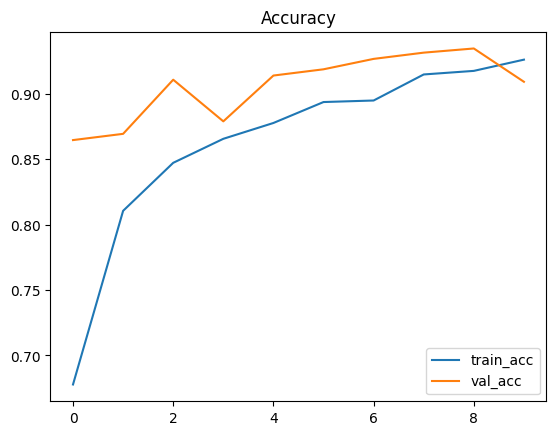

In [49]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [50]:
model.save('model/vehicle_model2.h5')

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # Save weights
# model.save_weights("model_weights.weights.h5")